In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

!ls data/

gender_submission .csv	test.csv  train.csv


In [2]:
PATH = 'data/'
train_df = pd.read_csv(f'{PATH}train.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
test_df = pd.read_csv(f'{PATH}/test.csv')

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<h3>Things to do with training set</h3>
<ol>
<li>Identify missing values related columns and further analyse. Check the relationships with end variable</li>
<li>Transfer objects to categorical/variables variables via one hot encoding</li>
<li></li>
</ol>

In [18]:
import seaborn as sns
%matplotlib inline

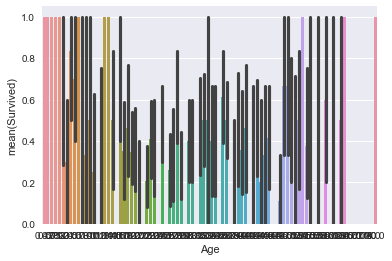

In [19]:
sns.barplot(x='Age',y='Survived',data=train_df, )

<h3>Hangling Missing values</h3>
<p><strong>Age</strong></p>

In [7]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

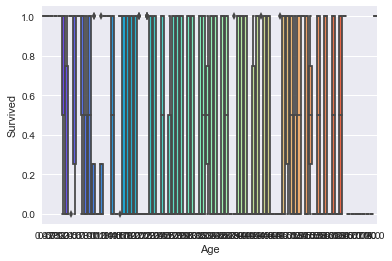

In [27]:
sns.boxplot(x="Age", y="Survived", data=train_df,palette='rainbow')

In [4]:
train_df['Age'].fillna(value=train_df['Age'].mean(), inplace=True)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
tempCabin = train_df.groupby('Cabin')

In [35]:
tempCabin.count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Cabin,,,,,,,,,,,
A10,1,1,1,1,1,1,1,1,1,1,1
A14,1,1,1,1,1,1,1,1,1,1,1
A16,1,1,1,1,1,1,1,1,1,1,1
A19,1,1,1,1,1,1,1,1,1,1,1
A20,1,1,1,1,1,1,1,1,1,1,1
A23,1,1,1,1,1,1,1,1,1,1,1
A24,1,1,1,1,1,1,1,1,1,1,1
A26,1,1,1,1,1,1,1,1,1,1,1
A31,1,1,1,1,1,1,1,1,1,1,1


In [11]:
tempCabin.max()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Cabin,,,,,,,,,,,
A10,584,0,1,"Ross, Mr. John Hugo",male,36.000000,0,0,13049,40.1250,C
A14,476,0,1,"Clifford, Mr. George Quincy",male,29.699118,0,0,110465,52.0000,S
A16,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.000000,1,0,11755,39.6000,C
A19,285,0,1,"Smith, Mr. Richard William",male,29.699118,0,0,113056,26.0000,S
A20,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.000000,1,0,PC 17485,56.9292,C
A23,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000000,0,0,27042,30.0000,S
A24,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.000000,0,0,PC 17590,50.4958,S
A26,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.000000,0,0,13213,35.5000,C
A31,210,1,1,"Blank, Mr. Henry",male,40.000000,0,0,112277,31.0000,C


<h3>Seems like this feature needs more improvements. So for the moment let's drop this feature and create our model</h3>

In [6]:
train_df.drop('Cabin', axis=1, inplace=True)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [8]:
tempEmbarked = train_df.groupby('Embarked').count()
tempEmbarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
Embarked,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77,77,77,77
S,644,644,644,644,644,644,644,644,644,644


In [9]:
train_df['Embarked'].fillna(value='S', inplace=True)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


<h2>Transfer objects to categorical values or numeric values using one hot encoder</h2>

In [11]:
df_train = train_df

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [51]:
pd.__version__

'0.19.2'

In [13]:
pd.get_dummies(data=train_df, columns=['Sex', 'Embarked'])

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,0,1,0,0,1
5,6,0,3,"Moran, Mr. James",29.699118,0,0,330877,8.4583,0,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.000000,0,0,17463,51.8625,0,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.000000,3,1,349909,21.0750,0,1,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,0,2,347742,11.1333,1,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,1,0,237736,30.0708,1,0,1,0,0


In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [15]:
train_df.groupby('Ticket').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
Ticket,,,,,,,,,,
110152,3,3,3,3,3,3,3,3,3,3
110413,3,3,3,3,3,3,3,3,3,3
110465,2,2,2,2,2,2,2,2,2,2
110564,1,1,1,1,1,1,1,1,1,1
110813,1,1,1,1,1,1,1,1,1,1
111240,1,1,1,1,1,1,1,1,1,1
111320,1,1,1,1,1,1,1,1,1,1
111361,2,2,2,2,2,2,2,2,2,2
111369,1,1,1,1,1,1,1,1,1,1


In [20]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
train_df['Ticket'].nunique()

681

In [63]:
681/891

0.7643097643097643

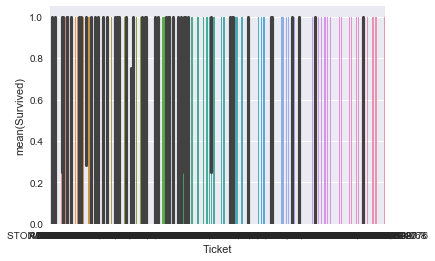

In [64]:
sns.barplot(x='Ticket',y='Survived',data=train_df )

TypeError: unsupported operand type(s) for /: 'str' and 'int'

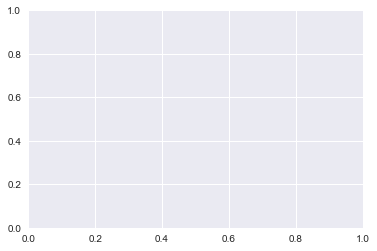

In [66]:
sns.distplot(train_df['Ticket'])

<p>We have 681 out of 891 unique ticket ids. Do we need to one-hot encode ?</p>

In [17]:
train_df.drop('Ticket', axis=1, inplace=True)

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [19]:
train_df2 = pd.get_dummies(data=train_df, columns=['Sex', 'Embarked'])

In [42]:
train_df2

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,8.0500,0,1,0,0,1
5,6,0,3,"Moran, Mr. James",29.699118,0,0,8.4583,0,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.000000,0,0,51.8625,0,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.000000,3,1,21.0750,0,1,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,0,2,11.1333,1,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,1,0,30.0708,1,0,1,0,0


In [20]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Sex_female     891 non-null uint8
Sex_male       891 non-null uint8
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
dtypes: float64(2), int64(5), object(1), uint8(5)
memory usage: 60.1+ KB


In [21]:
train_df2.drop('Name', axis=1, inplace=True)

In [45]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Sex_female     891 non-null uint8
Sex_male       891 non-null uint8
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
dtypes: float64(2), int64(5), uint8(5)
memory usage: 53.2 KB


<p>Do we need to drop passenger ID ?</p>

<h3>Split to training and test set</h3>

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train, valid = train_test_split(train_df2, test_size=0.2)


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 627 to 214
Data columns (total 12 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
Sex_female     712 non-null uint8
Sex_male       712 non-null uint8
Embarked_C     712 non-null uint8
Embarked_Q     712 non-null uint8
Embarked_S     712 non-null uint8
dtypes: float64(2), int64(5), uint8(5)
memory usage: 48.0 KB


In [25]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 597 to 255
Data columns (total 12 columns):
PassengerId    179 non-null int64
Survived       179 non-null int64
Pclass         179 non-null int64
Age            179 non-null float64
SibSp          179 non-null int64
Parch          179 non-null int64
Fare           179 non-null float64
Sex_female     179 non-null uint8
Sex_male       179 non-null uint8
Embarked_C     179 non-null uint8
Embarked_Q     179 non-null uint8
Embarked_S     179 non-null uint8
dtypes: float64(2), int64(5), uint8(5)
memory usage: 12.1 KB


In [26]:
passenger_ids_in_training = train['PassengerId']

In [27]:
passenger_ids_in_valid = valid['PassengerId']

In [28]:
#drop passenger Id from training and validation
train.drop('PassengerId', axis=1, inplace=True)

/home/coolck/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
#drop passenger Id from training and validation
valid.drop('PassengerId', axis=1, inplace=True)

/home/coolck/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 627 to 214
Data columns (total 11 columns):
Survived      712 non-null int64
Pclass        712 non-null int64
Age           712 non-null float64
SibSp         712 non-null int64
Parch         712 non-null int64
Fare          712 non-null float64
Sex_female    712 non-null uint8
Sex_male      712 non-null uint8
Embarked_C    712 non-null uint8
Embarked_Q    712 non-null uint8
Embarked_S    712 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 42.4 KB


In [33]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 597 to 255
Data columns (total 11 columns):
Survived      179 non-null int64
Pclass        179 non-null int64
Age           179 non-null float64
SibSp         179 non-null int64
Parch         179 non-null int64
Fare          179 non-null float64
Sex_female    179 non-null uint8
Sex_male      179 non-null uint8
Embarked_C    179 non-null uint8
Embarked_Q    179 non-null uint8
Embarked_S    179 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 10.7 KB


In [34]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

NameError: name 'dataset' is not defined

In [35]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
627,1,1,21.000000,0,0,77.9583,1,0,0,0,1
202,0,3,34.000000,0,0,6.4958,0,1,0,0,1
313,0,3,28.000000,0,0,7.8958,0,1,0,0,1
109,1,3,29.699118,1,0,24.1500,1,0,0,1,0
629,0,3,29.699118,0,0,7.7333,0,1,0,1,0


In [64]:
a = train.iloc[:,1:].values
a[0]

array([  1.    ,  36.    ,   0.    ,   0.    , 135.6333,   1.    ,
         0.    ,   1.    ,   0.    ,   0.    ])

In [36]:
X_train = train.iloc[:,1:].values
y_train = train.iloc[:,0].values

In [37]:
valid.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
597,0,3,49.000000,0,0,0.0000,0,1,0,0,1
738,0,3,29.699118,0,0,7.8958,0,1,0,0,1
806,0,1,39.000000,0,0,0.0000,0,1,0,0,1
271,1,3,25.000000,0,0,0.0000,0,1,0,0,1
561,0,3,40.000000,0,0,7.8958,0,1,0,0,1


In [38]:
X_valid = valid.iloc[:,1:].values
y_valid = valid.iloc[:,0].values

In [46]:
# Importing the Keras libraries and packages
import theano

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [47]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

/home/coolck/anaconda3/envs/fastai/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/coolck/anaconda3/envs/fastai/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [48]:
# Initialising the ANN
classifier = Sequential()

In [51]:
X_train


array([[ 1.        , 21.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.        , 34.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.        , 28.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 2.        , 39.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , 31.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 3.        , 29.69911765,  1.        , ...,  0.        ,
         1.        ,  0.        ]])

In [52]:
# Adding the input layer and the first hidden layer
#number of parameters is 10
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))

In [53]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

In [54]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [56]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [59]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 250)


Epoch 1/250
712/712 [==============================] - 0s 192us/step - loss: 0.4049 - acc: 0.8315
Epoch 2/250
712/712 [==============================] - 0s 199us/step - loss: 0.4113 - acc: 0.8258
Epoch 3/250
712/712 [==============================] - 0s 187us/step - loss: 0.4072 - acc: 0.8343
Epoch 4/250
712/712 [==============================] - 0s 206us/step - loss: 0.4063 - acc: 0.8329
Epoch 5/250
712/712 [==============================] - 0s 190us/step - loss: 0.4044 - acc: 0.8272
Epoch 6/250
712/712 [==============================] - 0s 194us/step - loss: 0.4077 - acc: 0.8329
Epoch 7/250
712/712 [==============================] - 0s 181us/step - loss: 0.4036 - acc: 0.8315
Epoch 8/250
712/712 [==============================] - 0s 192us/step - loss: 0.4063 - acc: 0.8329
Epoch 9/250
712/712 [==============================] - 0s 206us/step - loss: 0.4060 - acc: 0.8301
Epoch 10/250
712/712 [==============================] - 0s 189us/step - loss: 0.4069 - acc: 0.8315
Epoch 11/250
712/71

712/712 [==============================] - 0s 248us/step - loss: 0.3991 - acc: 0.8315
Epoch 84/250
712/712 [==============================] - 0s 276us/step - loss: 0.3984 - acc: 0.8258
Epoch 85/250
712/712 [==============================] - 0s 266us/step - loss: 0.4012 - acc: 0.8272
Epoch 86/250
712/712 [==============================] - 0s 184us/step - loss: 0.3998 - acc: 0.8287
Epoch 87/250
712/712 [==============================] - 0s 199us/step - loss: 0.3979 - acc: 0.8329
Epoch 88/250
712/712 [==============================] - 0s 202us/step - loss: 0.4010 - acc: 0.8258
Epoch 89/250
712/712 [==============================] - 0s 198us/step - loss: 0.4014 - acc: 0.8216
Epoch 90/250
712/712 [==============================] - 0s 180us/step - loss: 0.4002 - acc: 0.8216
Epoch 91/250
712/712 [==============================] - 0s 220us/step - loss: 0.4018 - acc: 0.8272
Epoch 92/250
712/712 [==============================] - 0s 221us/step - loss: 0.3977 - acc: 0.8315
Epoch 93/250
712/712 [=

712/712 [==============================] - 0s 200us/step - loss: 0.3956 - acc: 0.8287
Epoch 166/250
712/712 [==============================] - 0s 210us/step - loss: 0.4006 - acc: 0.8287
Epoch 167/250
712/712 [==============================] - 0s 190us/step - loss: 0.3997 - acc: 0.8202
Epoch 168/250
712/712 [==============================] - 0s 200us/step - loss: 0.3985 - acc: 0.8315
Epoch 169/250
712/712 [==============================] - 0s 203us/step - loss: 0.3969 - acc: 0.8329
Epoch 170/250
712/712 [==============================] - 0s 188us/step - loss: 0.4010 - acc: 0.8258
Epoch 171/250
712/712 [==============================] - 0s 194us/step - loss: 0.3964 - acc: 0.8329
Epoch 172/250
712/712 [==============================] - 0s 173us/step - loss: 0.3947 - acc: 0.8329
Epoch 173/250
712/712 [==============================] - 0s 207us/step - loss: 0.3936 - acc: 0.8315
Epoch 174/250
712/712 [==============================] - 0s 236us/step - loss: 0.3955 - acc: 0.8301
Epoch 175/250


712/712 [==============================] - 0s 229us/step - loss: 0.3979 - acc: 0.8343
Epoch 248/250
712/712 [==============================] - 0s 230us/step - loss: 0.3921 - acc: 0.8329
Epoch 249/250
712/712 [==============================] - 0s 240us/step - loss: 0.3950 - acc: 0.8272
Epoch 250/250
712/712 [==============================] - 0s 215us/step - loss: 0.3903 - acc: 0.8343


In [60]:
# Predicting the Test set results
y_pred = classifier.predict(X_valid)
y_pred = (y_pred > 0.5)


In [61]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, y_pred)

In [62]:
cm

array([[105,  10],
       [ 21,  43]])

<h3>Things to do with test set</h3>
<ol>
<li>Identify missing values related columns and further analyse. Do same things what did to traning set.</li>
<li>Transfer objects to categorical/variables variables via one hot encoding. Do same things what did to traning set.</li>
<li></li>
</ol>

In [63]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
test2_df = test_df
test2_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
test2_df.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

In [66]:
test2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [67]:
test2_df['Age'].fillna(value=test2_df['Age'].mean(), inplace=True)

In [68]:
test2_df['Fare'].fillna(value=test2_df['Fare'].mean(), inplace=True)

In [69]:
test2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [70]:
test3_df = pd.get_dummies(data=test2_df, columns=['Sex', 'Embarked'])

In [72]:
test3_df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,0,1,0,1,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1


In [73]:
test_set_passenger_id = test3_df['PassengerId']

In [74]:
test3_df.drop(['PassengerId'], axis=1, inplace=True)

In [75]:
test3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Sex_female    418 non-null uint8
Sex_male      418 non-null uint8
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.4 KB


In [ ]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values


In [76]:
test3_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1


In [78]:
X_test = test3_df.iloc[:,:].values

In [79]:
# Predicting the Test set results
y_predTest = classifier.predict(X_test)
y_predTest = (y_predTest > 0.5)

In [80]:
y_predTest

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

In [81]:
y_predTest.dtype

dtype('bool')

In [83]:
# Predicting the Test set results
y_predTest2 = classifier.predict(X_test)
y_predTest2 = int(y_predTest > 0.5)

TypeError: only size-1 arrays can be converted to Python scalars

In [84]:
test2222 = y_predTest.astype(int)

In [87]:
np.array(test2222)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
    

In [88]:
test_set_passenger_id.dtype

dtype('int64')

In [89]:
test2222.dtype

dtype('int64')

In [95]:
dfFinalTest = pd.DataFrame((test_set_passenger_id),columns='PassengerId'.split())

In [96]:
dfFinalTest

,PassengerId
0,892
1,893
2,894
3,895
4,896
5,897
6,898
7,899
8,900
9,901


In [97]:
dfFinalTestSurvive = pd.DataFrame((test2222),columns='Survived'.split())

In [102]:
dfFinalTestSurvive

,Survived
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,1
9,0


In [108]:
v2 = pd.concat([dfFinalTest,dfFinalTestSurvive])

In [109]:
v2.head()

,PassengerId,Survived
0,892.0,NaN
1,893.0,NaN
2,894.0,NaN
3,895.0,NaN
4,896.0,NaN


In [111]:
dfFinalTest.reset_index(drop=True, inplace=True)

In [112]:
dfFinalTestSurvive.reset_index(drop=True, inplace=True)

In [114]:
v3 = (pd.concat([dfFinalTest, dfFinalTestSurvive], axis=1))

In [115]:
v3.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [122]:
v3.to_csv('submission1.csv', sep='\t' , index=False,  line_terminator='\n')